In [15]:
import pandas as pd
import pyodbc

def red_data_sqlserver():
    server = 'localhost\SERVIDORSQL'
    database = 'Import2016'
    username = 'sa'
    password = 'Carvajal2022'
    cnxn = pyodbc.connect(
        'DRIVER={SQL Server};SERVER=' + server + ';DATABASE=' + database + ';UID=' + username + ';PWD=' + password)
    cursor = cnxn.cursor()
    # select 26 rows from SQL table to insert in dataframe.
    query = "SELECT TOP (1000) *  FROM [Import2016].[dbo].[Abril$];"
    df = pd.read_sql(query, cnxn)
    return df

def duplicados(df):
    # Validacion de crecimiento de demanda por medio de los valores duplicados para lo cual tomamos los valores de FECH=Fecha_de_proceso, PAISGEN=Pais_origen
    # NABAM=Posición_arancelaria que es con la cual identificamos el tipo de producto y PAISPRO=Pais_productor, de modo que por medio de este vamos a saber 
    # cual es el tipo que mas veces se importa de la misma procedencia identificando así los lugares de los cuales se empieza a depender mas para evaluar 
    # el porque de esta procedencia con las de mas consultas

    df['Crecimiento_Demanda'] = df.FECH.astype(str).str.cat([df.PAISGEN.astype(str), df.PAISPRO.astype(str),
    df.PAISCOM.astype(str), df.NABAN.apply(str)], sep='-')
    print(df)

    # Listamos y Revisamos las colmunas que tengan alto numero de duplicados

    print(df.Crecimiento_Demanda.value_counts())
    
    # Revisamos variables en las que se encuentren gran cantidad de registros con el mismo valor 

    n_records = len(df)
    def valores_duplicados_col(df):
        for columna in df:
            n_por_valor = df[columna].value_counts()
            mas_comun = n_por_valor.iloc[0]
            menos_comun = n_por_valor.iloc[-1]
            print("{} | {}-{} | {}".format(
                df[columna].name,
                round(mas_comun / (1.0*n_records),3),
                round(menos_comun / (1.0*n_records),3),
                df[columna].dtype
        ))

    valores_duplicados_col(df)
    
    #Graficamos el resltado de nuestra consulta

    print(df.Crecimiento_Demanda.value_counts(normalize=True).plot.barh())

c:\Users\Edison\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


       FECH  ADUA  PAISGEN  PAISPRO  PAISCOM  DEPTODES  VIATRANS  BANDERA  \
0    1504.0  35.0    249.0    249.0    580.0      11.0       1.0    580.0   
1    1504.0  35.0    249.0    249.0    580.0      11.0       1.0    580.0   
2    1504.0  35.0    249.0    249.0    580.0      11.0       1.0    580.0   
3    1504.0  35.0    249.0    249.0    580.0      17.0       1.0    580.0   
4    1504.0  35.0    249.0    249.0    580.0      17.0       1.0    580.0   
..      ...   ...      ...      ...      ...       ...       ...      ...   
383  1504.0  87.0    249.0    249.0    580.0      20.0       1.0    472.0   
384  1504.0  87.0    249.0    249.0    580.0       5.0       1.0    472.0   
385  1504.0  35.0    249.0    249.0    249.0      25.0       1.0    580.0   
386  1504.0  35.0    249.0    249.0    580.0      11.0       1.0    580.0   
387  1504.0  35.0    589.0    589.0    589.0      11.0       1.0    589.0   

    REGIMEN      PBK  ...  SEGUROS          LUIN CODLUIN  DEPIM COPAEX TIPO

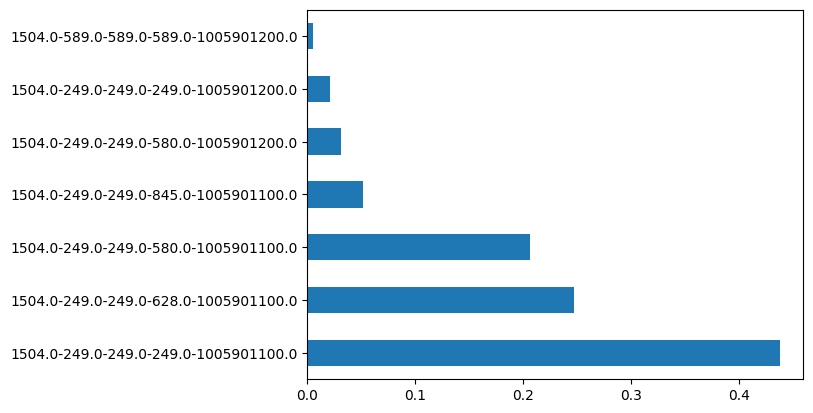

In [14]:
# Llamamos la funcion creada para de este modo mostrar los datos trabajados

df = red_data_sqlserver()
duplicados(df)

In [16]:

#Creamos nuestra funcion para validar los valores inexistentes
def inexistentes(df):
    n_records = len(df)

    def valores_inexistentes_col(df):
        for columna in df:
            print("{} | {} | {}".format(
                df[columna].name, len(df[df[columna].isnull()]) / (1.0 * n_records), df[columna].dtype
            ))

    valores_inexistentes_col(df)


In [17]:
# Llamamos la funcion creada para de este modo mostrar los datos trabajados y podemos identificar que en nuestra evaluacion no exiten datos inexistentes
# dentro de las columna restantes de nuestra limpieza
df = red_data_sqlserver()
inexistentes(df)

FECH | 0.0 | float64
ADUA | 0.0 | float64
PAISGEN | 0.0 | float64
PAISPRO | 0.0 | float64
PAISCOM | 0.0 | float64
DEPTODES | 0.0 | float64
VIATRANS | 0.0 | float64
BANDERA | 0.0 | float64
REGIMEN | 0.0 | object
PBK | 0.0 | object
PNK | 0.0 | object
CANU | 0.0 | float64
CODA | 0.0 | object
NABAN | 0.0 | float64
VAFODO | 0.0 | object
FLETE | 0.0 | object
VACID | 0.0 | object
VACIP | 0.0 | float64
IMP1 | 0.0 | float64
CLASE | 0.0 | object
CUIDAIMP | 0.0 | float64
CUIDAEXP | 0.0 | object
CODADAD | 0.0 | float64
VADUA | 0.0 | object
BASEIVA | 0.0 | float64
TOTALIVAYO | 0.0 | float64
SEGUROS | 0.0 | object
LUIN | 0.0 | object
CODLUIN | 0.0 | object
DEPIM | 0.0 | float64
COPAEX | 0.0 | float64
TIPOIM | 0.0 | float64
NIT | 0.0 | float64
DIGV | 0.0 | float64
RZIMPO | 0.0 | object


c:\Users\Edison\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
